**Forecasting by Smoothing Techniques**


Smoothing can be a good first step in describing various components of the series. The commonly used methods are :
1. Single or simple Exponential Smoothing (SES)
2. Double Exponential Smoothing (DES)
3. Triple Exponential Smoothing (TES) a.k.a. Holt-Winters


In [7]:
#importing various libraries and warnings option
import itertools
import warnings
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error
warnings.filterwarnings('ignore')
#importing dataset
df = pd.read_csv('airline-passengers.csv', index_col='month', parse_dates=True)
#first 5 observation
df.head()

,total_passengers
month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [8]:
# let's express that index will be monthly
df.index.freq = "MS"
# then we split the dataset into as train and test sets. 
train = df[:120]
test = df[120:]

__1. Single Exponential Smoothing__

  The simple exponential smoothing (SES) model is usu-ally based on the premise that the level of time series shouldfluctuate about a constant level or change slowly over thetime[1].
  It requires a single parameter, called alpha (a), also called the smoothing factor or smoothing coefficient. This parameter controls the rate at which the influence of the observations at prior time steps decay exponentially. Alpha is often set to a value between 0 and 1. Large values mean that the model pays attention mainly to the most recent past observations, whereas smaller values mean more of the history is taken into account when making a prediction[2].
  Model learning last observation, remembering last prediction.

In [9]:
def optimize_ses(train, alphas, step=24):
    '''
    :param train: train set
    :param alphas: smoothing coefficient
    :param step: step size
    this function  allows us to find the optimum alpha parameters
    ses_model: forecasting number of step
    mae: mean absolute error value according to test set
    print all alfa and mae value 
    '''
    for alpha in alphas:
        ses_model = SimpleExpSmoothing(train).fit(smoothing_level=alpha) 
        y_pred = ses_model.forecast(step) 
        mae = mean_absolute_error(test, y_pred) 
        print("alpha:", round(alpha, 2), "mae:", round(mae, 4)) 

#selecting combinations of alpha that increase 0.10 units between 0.01 and 1
alphas = np.arange(0.01, 1, 0.10) 
optimize_ses(train, alphas, step=24) #calling optimize function



alpha: 0.01 mae: 190.1196
alpha: 0.11 mae: 82.528
alpha: 0.21 mae: 82.8979
alpha: 0.31 mae: 89.8377
alpha: 0.41 mae: 99.0585
alpha: 0.51 mae: 107.5558
alpha: 0.61 mae: 113.7514
alpha: 0.71 mae: 117.2224
alpha: 0.81 mae: 118.1776
alpha: 0.91 mae: 117.2438


Best alpha value 0.11 (smallest mae:82.528)

In [10]:
#model fitting on train set
ses_model = SimpleExpSmoothing(train).fit(smoothing_level=0.11) 
#forecasting ses model. We're a 24-month forecast for that test set are 24 units
y_pred = ses_model.forecast(24) 


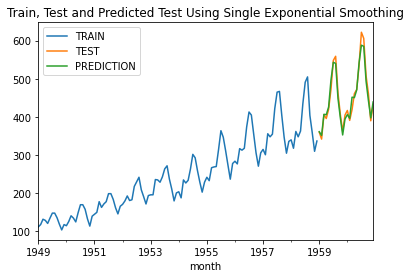

In [15]:
#smoothing models plot
def plot_prediction(y_pred, label):
    '''

    :param y_pred: predicted values
    :param label: plotting on train or test set
    this function gives us the plot of the train and test sets, prediction values.
    plot labels are TRAIN, TEST, PREDICTION

    '''
    train["total_passengers"].plot(legend=True, label="TRAIN")
    test["total_passengers"].plot(legend=True, label="TEST") 
    y_pred.plot(legend=True, label="PREDICTION") 
    plt.title("Train, Test and Predicted Test Using "+label) #grafik adı sırasıyla
    plt.show()

#calling the funnction
plot_prediction(y_pred, "Single Exponential Smoothing")



In the graph, it is seen that our forecast cannot catch the seasonality and trend and does not give good results.


__2. Double Exponential Smoothing__

Same as SES model, additionally considering trend effect. 
In addition to the alpha parameter for controlling smoothing factor for the level, an additional smoothing factor is added to control the decay of the influence of the change in trend called beta (b)[3].



In [11]:
def optimize_des(train, alphas, betas, step=24):
    '''
    
    :param train:train set 
    :param alphas: smoothing coefficient alpha
    :param betas:  smoothing coefficient beta
    :param step: step size
    des_model  fits in additive form over train by making exponential smoothing
    This function first creates an empty list called result and 
    then prints it by adding the 'mae' to this list with alpha and beta combinations. 
    des_model y_pred and mae calculated in this function.The model can be fitted according to the best parameters.
   and y estimation values are calculated
    alpha=level beta=trend
    '''
    print("Optimizing parameters...")
    results = []
    for alpha in alphas: 
        for beta in betas:
            des_model = ExponentialSmoothing(train, trend="add").fit(smoothing_level=alpha, smoothing_slope=beta)
            y_pred = des_model.forecast(step) 
            mae = mean_absolute_error(test, y_pred) 
            results.append([round(alpha, 2), round(beta, 2), round(mae, 2)])
    results = pd.DataFrame(results, columns=["alpha", "beta", "mae"]).sort_values("mae") 
    print(results) 

#selecting combinations of alpha and beta that increase 0.10 units between 0.01 and 1
alphas = np.arange(0.01, 1, 0.10) 
betas = np.arange(0.01, 1, 0.10)
#calling optimize function
optimize_des(train, alphas, betas, step=24)

Optimizing parameters...
    alpha  beta      mae
1    0.01  0.11    54.10
0    0.01  0.01    54.95
10   0.11  0.01    55.03
2    0.01  0.21    55.56
20   0.21  0.01    57.18
..    ...   ...      ...
47   0.41  0.71   816.47
48   0.41  0.81   856.88
49   0.41  0.91   861.18
38   0.31  0.81   921.24
39   0.31  0.91  1013.81

[100 rows x 3 columns]


best parameters are  alpha = 0.01 and beta = 0.11    (mae=54.10)

In [12]:
#fitting des model with best parameters(level=alpha, slope=beta, additive model)
des_model = ExponentialSmoothing(train, trend="add").fit(smoothing_level=0.01, smoothing_slope=0.11)
#forecasting des model for 24 obs
y_pred = des_model.forecast(24) 


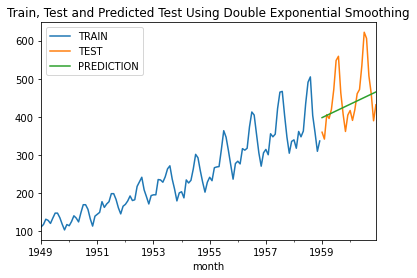

In [13]:
#calling plot pred function
plot_prediction(y_pred, "Double Exponential Smoothing")


DES model forecast trend but could not catch seasonality.

__3. Triple Exponential Smoothing a.k.a. Holt-Winters__
  Being an adaptive method, Holt-Winter’s exponential smoothing allows the level, trend and seasonality patterns to change over time[4].

In [13]:
#set of parameters that gives the optimal value from a function
def optimize_tes(train, abg, step=24):
    '''
    :param train: train set
    :param abg: alpha beta gamma parameters(level, slope, seasonal)
    :param step: step size
    TES model is fit over alpha beta gamma parameters.
    TES model is forecast in the number of steps and the mae is calculated.
    Optimum parameters are obtained according to the smallest mae value
    seasonal periods: 12 months
    trend and seasonal are additive model

    '''
    print("Optimizing parameters...")
    results = []
    for comb in abg: 
        tes_model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12).\
            fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])
        y_pred = tes_model.forecast(step) 
        mae = mean_absolute_error(test, y_pred) 
        print([round(comb[0], 2), round(comb[1], 2), round(comb[2], 2), round(mae, 2)])
        results.append([round(comb[0], 2), round(comb[1], 2), round(comb[2], 2), round(mae, 2)])
    results = pd.DataFrame(results, columns=["alpha", "beta", "gamma", "mae"]).sort_values("mae")
    print(results)

    
#if the parameters are close to 0, the last forecasted values are weighted, if they are close to 1,
#the last real values are weighted.
#selecting combinations of alpha, beta and gamma that increase 0.20 units between 0.10 and 1
alphas = betas = gammas = np.arange(0.10, 1, 0.20)
abg = list(itertools.product(alphas, betas, gammas))

#forecasting ses model. We're a 24-month forecast for that test set are 24 units
optimize_tes(train, abg, step=24)

Optimizing parameters...
[0.1, 0.1, 0.1, 36.83]
[0.1, 0.1, 0.3, 34.88]
[0.1, 0.1, 0.5, 35.91]
[0.1, 0.1, 0.7, 38.72]
[0.1, 0.1, 0.9, 42.55]
[0.1, 0.3, 0.1, 53.96]
[0.1, 0.3, 0.3, 53.0]
[0.1, 0.3, 0.5, 56.98]
[0.1, 0.3, 0.7, 61.38]
[0.1, 0.3, 0.9, 67.17]
[0.1, 0.5, 0.1, 56.77]
[0.1, 0.5, 0.3, 51.72]
[0.1, 0.5, 0.5, 53.39]
[0.1, 0.5, 0.7, 60.08]
[0.1, 0.5, 0.9, 79.29]
[0.1, 0.7, 0.1, 34.04]
[0.1, 0.7, 0.3, 25.93]
[0.1, 0.7, 0.5, 27.81]
[0.1, 0.7, 0.7, 27.91]
[0.1, 0.7, 0.9, 38.32]
[0.1, 0.9, 0.1, 26.87]
[0.1, 0.9, 0.3, 25.32]
[0.1, 0.9, 0.5, 53.88]
[0.1, 0.9, 0.7, 38.38]
[0.1, 0.9, 0.9, 17.78]
[0.3, 0.1, 0.1, 54.54]
[0.3, 0.1, 0.3, 38.34]
[0.3, 0.1, 0.5, 31.57]
[0.3, 0.1, 0.7, 30.99]
[0.3, 0.1, 0.9, 29.23]
[0.3, 0.3, 0.1, 72.71]
[0.3, 0.3, 0.3, 22.6]
[0.3, 0.3, 0.5, 11.99]
[0.3, 0.3, 0.7, 17.11]
[0.3, 0.3, 0.9, 22.32]
[0.3, 0.5, 0.1, 132.33]
[0.3, 0.5, 0.3, 25.74]
[0.3, 0.5, 0.5, 17.3]
[0.3, 0.5, 0.7, 38.38]
[0.3, 0.5, 0.9, 56.82]
[0.3, 0.7, 0.1, 288.32]
[0.3, 0.7, 0.3, 134.86]
[0.3, 0.7

mae:11.99 alfa 0.3 beta 0.3 gamma 0.5 best parameters


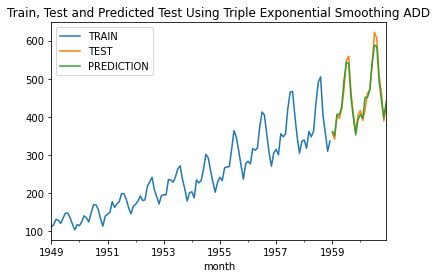

In [16]:
#fit the model by setting the optimum parameters
tes_model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12).\
            fit(smoothing_level=0.3, smoothing_slope=0.3, smoothing_seasonal=0.5)

#obtaining forecasting values
y_pred = tes_model.forecast(24)

#plotting additive TES model
plot_prediction(y_pred, "Triple Exponential Smoothing ADD")


According to the plot, our forecast model seems to be very good.